## Loading the data

In [26]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import random
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt


In [7]:
mcdonalds = pd.read_csv('https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')
print(mcdonalds.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


## Exploring Data

In [8]:
print(mcdonalds.shape)

(1453, 15)


In [9]:
print(mcdonalds.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [10]:
MD_x = mcdonalds.iloc[:, 0:11]
MD_x = (MD_x == "Yes").astype(int)
MD_x = MD_x.values
print(np.round(MD_x.mean(axis = 0), 2))

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [11]:
MD_pca = PCA()
MD_pca.fit(MD_x)
print(MD_pca.explained_variance_ratio_)

[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


In [12]:
print(MD_pca)

PCA()


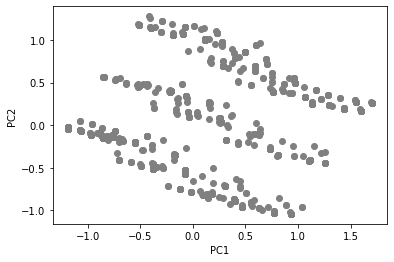

In [14]:

# to get the predicted cluster labels from PCA model
clusters = MD_pca.transform(MD_x)
plt.scatter(clusters[:, 0], clusters[:, 1], c='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Extracting segments

In [15]:
random.seed(1234)

clusters = range(2,9)
MD_km28 = []
for k in clusters:
    kmeans = KMeans(n_clusters=k, n_init = 10, random_state = 1234)
    kmeans.fit(MD_x)
    MD_km28.append(kmeans)

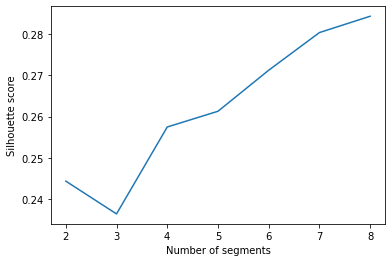

In [19]:
scores = []
for k in clusters:
    kmeans = MD_km28[k-2]
    preds = kmeans.predict(MD_x)
    score = silhouette_score(MD_x, preds)
    scores.append(score)

plt.plot(clusters, scores)
plt.xlabel('Number of segments')
plt.ylabel('Silhouette score')
plt.show()


In [34]:
random.seed(1234)

clusters = range(2,9)
MD_b28 = []
for k in clusters:
    kmeans = KMeans(n_clusters=k, n_init = 10, random_state = 1234)
    scores = []
    for i in range(100):
        X_resampled= resample(MD_x, n_samples=len(MD_x))
        kmeans.fit(X_resampled)
        preds = kmeans.predict(X_resampled)
        score = silhouette_score(X_resampled, preds)
        scores.append(score)
    MD_b28.append(scores)

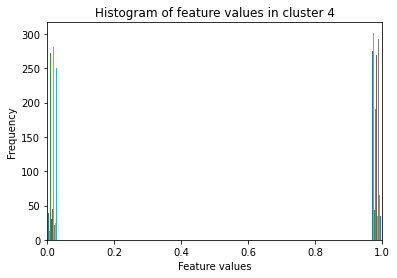

In [30]:
kmeans = MD_km28[2]
preds = kmeans.predict(MD_x)

plt.hist(MD_x[preds == 3], bins = 30, range = (0,1))
plt.xlim(0,1)
plt.xlabel("Feature values")
plt.ylabel("Frequency")
plt.title("Histogram of feature values in cluster 4")
plt.show()


In [35]:
kmeans = MD_km28[2]
preds = kmeans.predict(MD_x)
MD_k4 = MD_x[preds == 3]
